# P1 vs. P2 Venn Diagram of DEGs
using results from [deseq_p1.v.p2.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase1_v_phase2/deseq_p1.v.p2.ipynb) to look for DEGs that are shared/unique among the comparisons

## 0. load libraries

In [6]:
library(ggvenn)
library(tidyverse)
library(UpSetR)

## 1. data processing

### 1a. read DEG CSVs

In [7]:
# warm vs. warm control
w.wc.deg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/DEG.p1.w_v_p2.wc.csv')

# hypoxic vs. hypoxic control
h.hc.deg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/DEG.p1.h_v_p2.hc.csv')

# both vs. both control
b.bc.deg <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/deseq_res_files/DEG.p1.b_v_p2.bc.csv')
head(b.bc.deg)

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111109550,142.77568,6.6769389,1.2552767,2.400733e-08,3.367442e-06,Up
2,LOC111117743,91.14648,7.6801110,2.0123217,5.430220e-06,3.108536e-04,Up
3,LOC111117672,1990.16370,0.6312020,0.2240416,1.086620e-03,1.569117e-02,Up
4,LOC111138321,6327.60729,-0.6252756,0.2143074,8.359785e-04,1.302270e-02,Down
5,LOC111121058,95.17920,1.1779113,0.7369532,6.034352e-04,1.021164e-02,Up
6,LOC111116497,561.88934,1.2637368,0.3492333,5.415440e-07,4.737345e-05,Up


## 2. venn diagram

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors.”


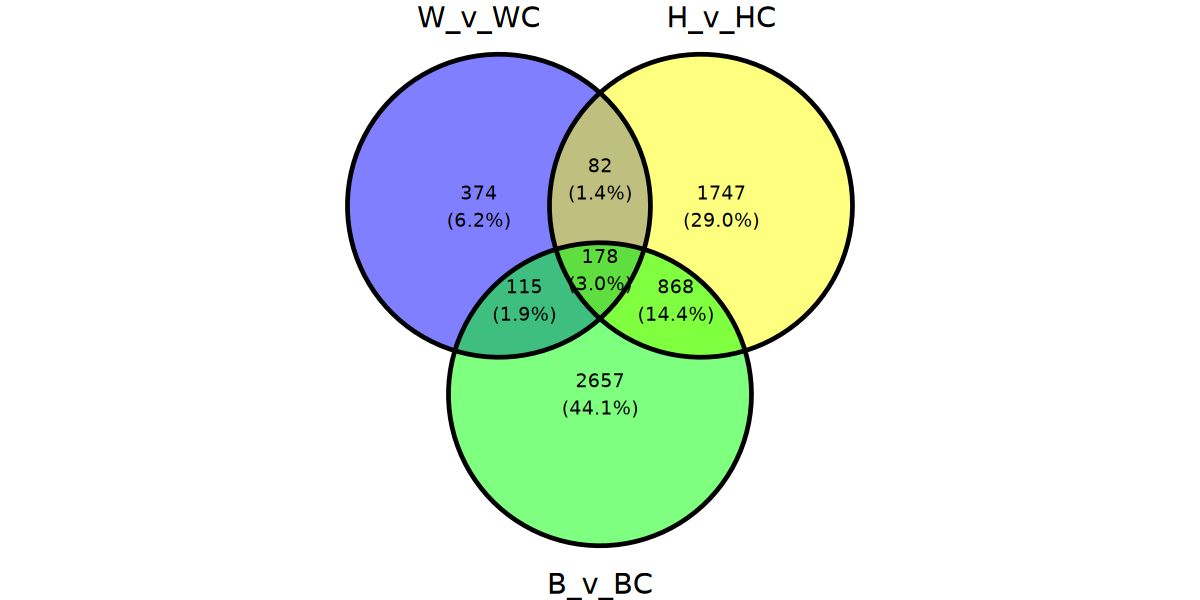

In [4]:
options(repr.plot.width=10, repr.plot.height=5)

# make list of dfs
x = list(W_v_WC = w.wc.deg$X,
         H_v_HC = h.hc.deg$X,
         B_v_BC = b.bc.deg$X)

ggvenn(x)

## 3. upSet Plot
similar to venn diagram, but different type of visual

using [`UpSetR`](https://github.com/hms-dbmi/UpSetR)

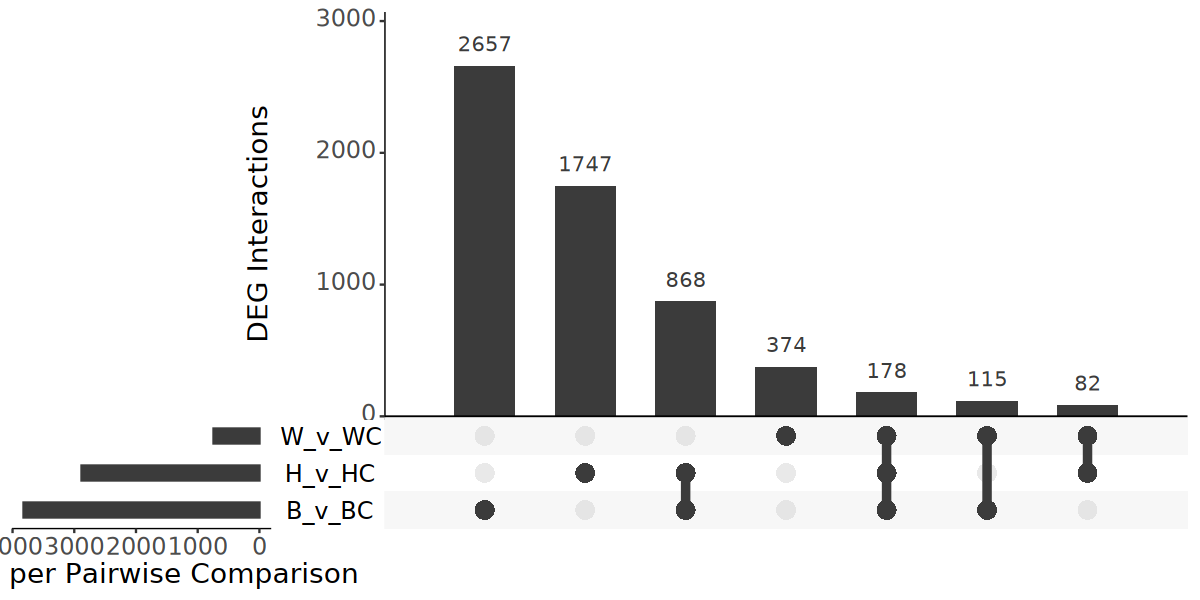

In [8]:
options(repr.plot.width=10, repr.plot.height=5)

upset_plot <- upset(fromList(x), nsets = 6,, order.by='freq', point.size = 5, line.size = 2, 
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

upset_plot

I'm not surprised that the majority of the DEGs are unique to that comparison - I think the only reason H vs. HC and B vs. BC share some DEGs is because they both had 1000s of DEGs identified, so there's bound to be overlap

In [12]:
pdf('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase2/plots/p1.p2_upset.pdf', width=20, height=10)
upset_plot
dev.off()

png 
  2